## Домашнее задание №2

В зависимости от эффективности решения баллы могут быть как понижены, так и повышены.

In [65]:
%matplotlib inline

In [66]:
import numpy as np

### 1. Выпуклая оболочка и площадь многоугольника

Вам дана функция, умеющая генерировать точки на плоскости, нормально распределенные вокруг заданного центра с заданным стандартным отклонением по каждой из осей.

In [67]:
def gen_points(n, x_loc, y_loc, scale):
    """
    >>> gen_points(1, 0, 0, 1).shape
    (1, 2)
    >>> ps = gen_points(5, 0, 0, 1)
    >>> ps.shape
    (5, 2)
    >>> ps.dtype
    dtype('float64')
    """
    
    return np.random.normal((x_loc, y_loc), scale, (n, 2))

И функция, возвращающая для заданного набора точек выпуклую оболочку в виде списка вершин в порядке обхода против часовой стрелки.

_Для нормальной работы функции требуется установленная библиотека scipy_

In [68]:
from scipy.spatial import ConvexHull

def build_convex_hull(points):
    """
    >>> ch = build_convex_hull(gen_points(3, 0, 0, 1))
    >>> ch.shape
    (3, 2)
    >>> np.cross(ch[1] - ch[0], ch[2] - ch[0]) > 0
    True
    """
    
    assert len(points) >= 3
    hull = ConvexHull(points)
    return hull.points[hull.vertices]

**(1 балл)** Написать функцию, считающую площадь заданного $n$ точками $(x_i, y_i)$ (в формате, описанном в предыдущем пункте) выпуклого многоугольника по формуле
$$ S = \frac 1 2 \sum_{i = 1}^n (x_i - x_{i + 1}) (y_i + y_{i + 1}) $$
где $(x_{n + 1}, y_{n + 1}) \equiv (x_1, y_1)$.

In [69]:
def calc_square(polygon):
    """
    >>> calc_square(np.array([[0., 0], [1, 0], [0, 1]]))
    0.5
    >>> calc_square(np.array([[0., 0], [1, 0], [1, 1], [0, 1]]))
    1.0
    """
    for i in range(len(polygon) - 1):
        x = polygon[i][0]-polygon[i+1][0]
        y = polygon[i][1]+polygon[i+1][1]
    sum = (x*y)/2  
    return(sum)

**(2 балла)** Написать функцию plot, которая принимает множество точек, строит по ним выпуклую оболочку и рисует полученные многоугольник и точки следующим образом:

In [126]:
import matplotlib.pyplot as plt


def plot(dots):
    b = build_convex_hull(gen_points(50, 0, 0, 10))
    x = b.T
    plt.fill(x[0], x[1], facecolor='none', edgecolor='purple', linewidth=3)
    plt.plot(x[0],x[1],'o')
    for i in range(8):
        plt.axvline(x[0][i], color ="green", linestyle ="--") 
    print(x[0])
    print(x[1])

IndexError: index 6 is out of bounds for axis 0 with size 6

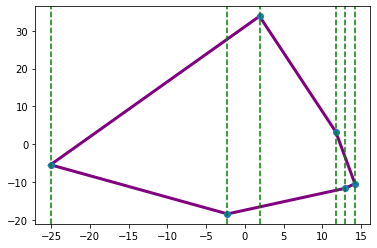

In [127]:
plot(gen_points(50, 0, 0, 10))

Похожесть оформления графика напрямую отразится на ваших баллах.

Функции, которые могут понадобиться при выполнении задания
- [plt.fill](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)
- [plt.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)
- [plt.axhline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axhline.html)
- [plt.vlines](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)

### 2. Численный метод ньютона для поиска корней

[Метод](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0) заключается в следующем:
    
Пусть дана дифференцируемая функция $f$. Необходимо найти решение $f(x) = 0$.

Если $x_0$ достаточно близко к решению уравнения $f(x) = 0$, тогда мы можем апроксимировать $f(x)$ с помощью касательной в точке $x_0$ и найти пересечение касательной с осью $x$. Полученное пересечение можно использовать как следующее приблежение, т.к. оно может оказаться ближе к корню, чем $x_0$.

Уравнение касательной в точке $x_0$:
$$y = f'(x_0) * (x - x_0) + f(x_0)$$

пересечение оси $x$ и касательной можно найти, решив уравнение:
$$0 = f'(x_0) * (x_1 - x_0) + f(x_0)$$

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$

Теперь, если мы продолжим итеративно вычислять новые значения $x$, то получим рекуррентную формулу:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

которая _может_ сойтись к решению уравнения $f(x) = 0$


**(2 балла)** Дан полином вида:

$$x^ 5 - 12 * x ^ 4 + 57 * x ^ 3 - 134 * x ^ 2 + 156 * x - 72$$

Необходимо  реализовать метод ньютона и найти один из корней полинома. Для представления полинома и вычисления значений и производной в разных точках воспользуйтесь [polynomials](https://numpy.org/doc/stable/reference/routines.polynomials.html).

Решение нужно искать с точностью до 0.001 (т.е. до тех пор, пока $f(x_n) > 0.001$).

В качестве начальной точки $x_0$ возьмите значение 4.5

С помощью функции `Polynomial.roots` убедитесь, что нашли правильное приближеине. 

**(1 балл)** Нарисуйте график полинома для значений $x \in [1, 5]$, как ниже. 

Также продемонстрируйте работу алгоритма, нарисовав касательные на каждой итерации и отметьте на графике $x_0$.

In [40]:
from scipy.misc import derivative
x_n = 4.5
x = np.linspace(0.2, 2.2, 500)
def f(x):
    return x**5-12*x**4+57*x**3-134*x**2+156*x-72
def x_next(f, x, x_n):
    slope = derivative(f, x_n, dx=000.1)
    return x_n - f(x_n) / slope
for n in range(100):
    print('x_{} = {:.6f}'.format(n + 1, x_n))
    x_n = x_next(f, x, x_n)

x_1 = 4.500000
x_2 = 4.107182
x_3 = 3.799961
x_4 = 3.562869
x_5 = 3.383648
x_6 = 3.252316
x_7 = 3.160201
x_8 = 3.099094
x_9 = 3.060938
x_10 = 3.038298
x_11 = 3.025197
x_12 = 3.017553
x_13 = 3.012927
x_14 = 3.009986
x_15 = 3.008018
x_16 = 3.006637
x_17 = 3.005629
x_18 = 3.004868
x_19 = 3.004276
x_20 = 3.003805
x_21 = 3.003423
x_22 = 3.003107
x_23 = 3.002842
x_24 = 3.002617
x_25 = 3.002424
x_26 = 3.002256
x_27 = 3.002109
x_28 = 3.001980
x_29 = 3.001865
x_30 = 3.001762
x_31 = 3.001670
x_32 = 3.001587
x_33 = 3.001511
x_34 = 3.001443
x_35 = 3.001380
x_36 = 3.001322
x_37 = 3.001268
x_38 = 3.001219
x_39 = 3.001174
x_40 = 3.001131
x_41 = 3.001092
x_42 = 3.001055
x_43 = 3.001020
x_44 = 3.000988
x_45 = 3.000958
x_46 = 3.000929
x_47 = 3.000902
x_48 = 3.000876
x_49 = 3.000852
x_50 = 3.000830
x_51 = 3.000808
x_52 = 3.000787
x_53 = 3.000768
x_54 = 3.000749
x_55 = 3.000731
x_56 = 3.000714
x_57 = 3.000698
x_58 = 3.000683
x_59 = 3.000668
x_60 = 3.000654
x_61 = 3.000640
x_62 = 3.000627
x_63 = 3.000615
x

In [130]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(0, 5, 5000)

def f(x):
    return x**5-12*x**4+57*x**3-134*x**2+156*x-72

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(order):
    x_n = 4.5
    ax.clear()
    ax.plot(x, f(x), label=r'$\func(x)$')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    plt.setp(ax, xticks=[0, 1, 2,3,4,5,6], xticklabels=['0', '1', '2','3','4','5','6'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 8)
    ax.legend(loc=4)
    plt.show()

- [plt.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)
- [plt.axhline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axhline.html)
- [plt.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)

<IPython.core.display.Javascript object>


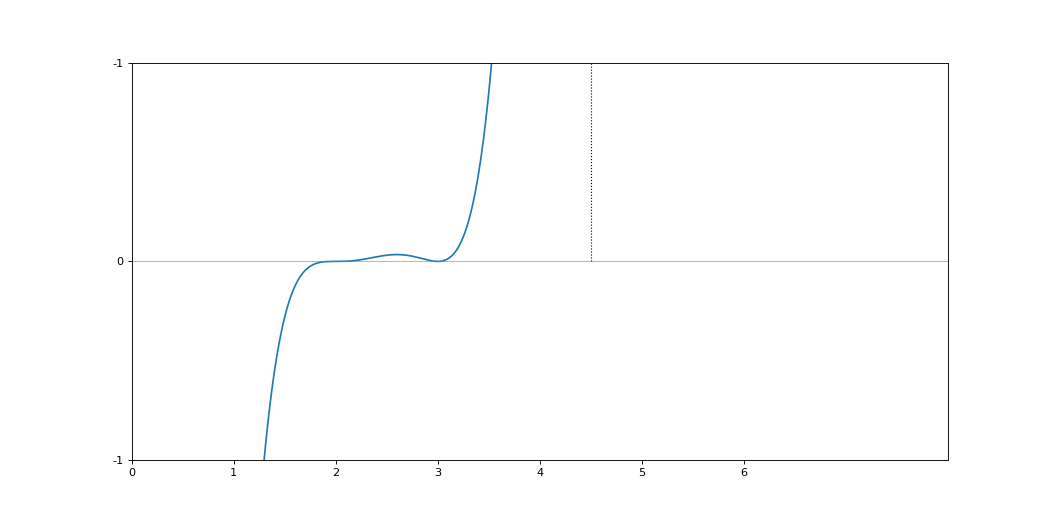

interactive(children=(IntSlider(value=1, description='order', max=12, min=1), Output()), _dom_classes=('widget…

In [131]:
fig, ax = plt.subplots(1, figsize=(13, 6.5))
order = widgets.IntSlider(min=1, max=12, value=1, description='order')
widgets.interactive(update_plot, order=order)